In [1]:
import pandas

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from seaborn import scatterplot

A tweedie regressor is best used for distributions which are otherwise approximately normal if not for an abnormal spike in the percentage equal to exactly 0. Since this distribution models the distribution for dividend yield, this regression model seems promising

In [5]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [6]:
x

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [7]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=432,test_size=0.15,shuffle=True)

In [9]:
len(x_test)

1217

In [10]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=145,test_size=0.2,shuffle=True)

In [11]:
print(len(x_train),len(x_test),len(x_val))

6896 973 244


In [12]:
def x_imputer(dataset):
    imputer=KNNImputer(n_neighbors=3)
    x_impute=imputer.fit_transform(dataset)
    x_impute=pandas.DataFrame(data=x_impute,columns=['Return_On_Equity','Current_Ratio','Asster_Turnover','WACC','Dividend_Yield','Earnings_Yield','Revenue_Change','Net_Income_Change'])
    return x_impute
x_train=x_imputer(x_train)
x_test=x_imputer(x_test)
x_val=x_imputer(x_val)

y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [13]:
x_train.isnull().astype(int).sum()/len(x_train)

Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [14]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [15]:
tweedie=TweedieRegressor()

In [16]:
tweedie.fit(x_train,y_train)

TweedieRegressor()

In [17]:
y_predict=tweedie.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but TweedieRegressor was fitted with feature names
  warnings.warn(


<Axes: xlabel='Price_Change'>

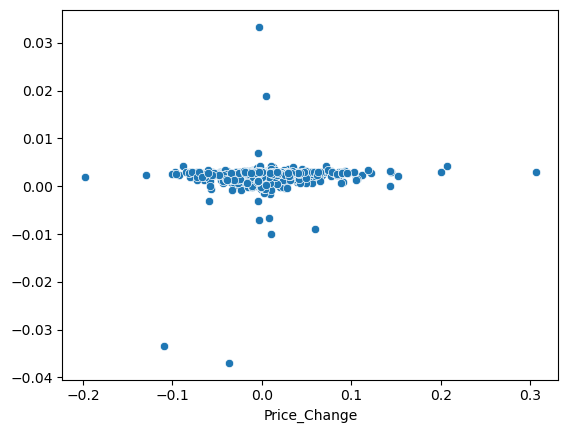

In [18]:
scatterplot(x=y_test,y=y_predict)

In [19]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.034844720347377275

Final evaluation of model

In [20]:
y_evaluation=tweedie.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but TweedieRegressor was fitted with feature names
  warnings.warn(


In [21]:
print(error)

3.6779340966639


<Axes: xlabel='Price_Change'>

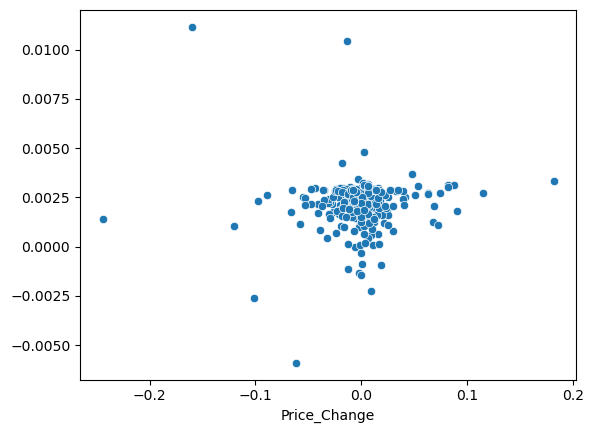

In [22]:
scatterplot(x=y_val,y=y_evaluation)

In [23]:
print((-1.96*error),(1.96*error))

-7.208750829461244 7.208750829461244
